## Data Preprocessing
    - 영상 데이터 전처리

In [37]:
# 정형 데이터 전처리
import seaborn as sns
import pandas as pd

## 환경구성

#### 설치 라이브러리
```python
!pip install opencv-python
```

In [38]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy

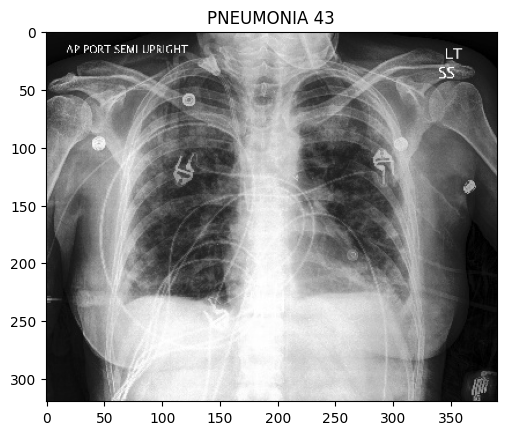

In [39]:
# data 경로 설정
data_dir = './datas/Pneumonia/Positive/'
categories = ['train','test','val']  # 전처리된 데이터셋을 훈련용, 평가용, 검증용으로 구분

# 7:2:1 or 8:1:1

# 샘플 이미지 시각화
img_name = os.listdir(data_dir)[42]
img_path = os.path.join(data_dir, img_name)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # 색감만 사라짐(미리처리)

plt.imshow(img, cmap='gray')
plt.title(f'PNEUMONIA 43')
plt.show()

### Image Resize

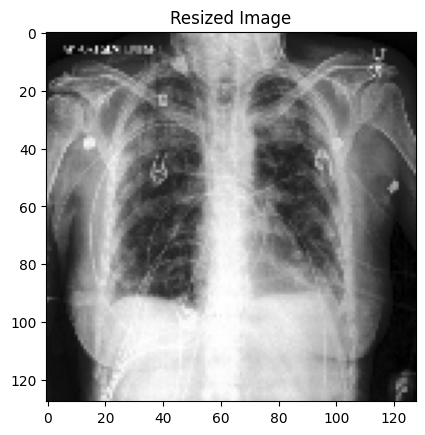

In [40]:
def resize_image(img, size=(128,128)):  # arg 세팅
    return cv2.resize(img, size)

resized_img = resize_image(img)
plt.imshow(resized_img, cmap='gray')
plt.title('Resized Image')
plt.show()

### Histogram Equalization
    - image level 평활화

In [41]:
?cv2.equalizeHist

Docstring:
equalizeHist(src[, dst]) -> dst
.   @brief Equalizes the histogram of a grayscale image.
.   
.   The function equalizes the histogram of the input image using the following algorithm:
.   
.   - Calculate the histogram \f$H\f$ for src .
.   - Normalize the histogram so that the sum of histogram bins is 255.
.   - Compute the integral of the histogram:
.   \f[H'_i =  \sum _{0  \le j < i} H(j)\f]
.   - Transform the image using \f$H'\f$ as a look-up table: \f$\texttt{dst}(x,y) = H'(\texttt{src}(x,y))\f$
.   
.   The algorithm normalizes the brightness and increases the contrast of the image.
.   
.   @param src Source 8-bit single channel image.
.   @param dst Destination image of the same size and type as src .
Type:      builtin_function_or_method

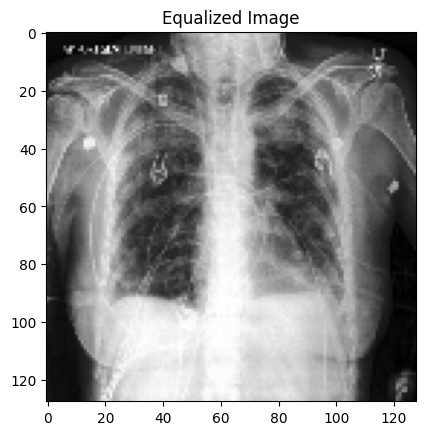

In [42]:
def he_img(img):
    return cv2.equalizeHist(img)
equalized_img = he_img(img)

plt.imshow(resized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

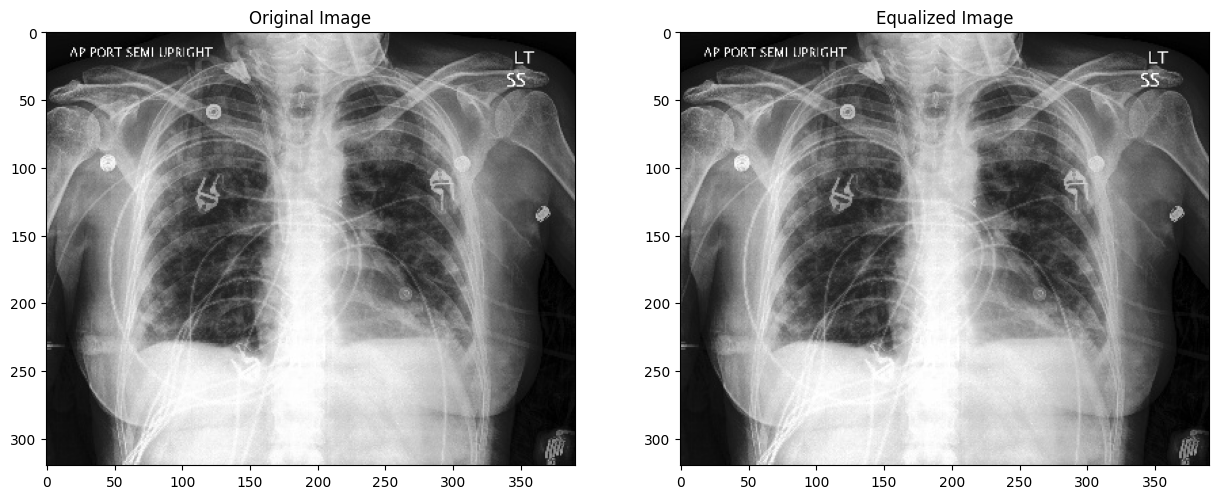

In [43]:
equalized_img = he_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

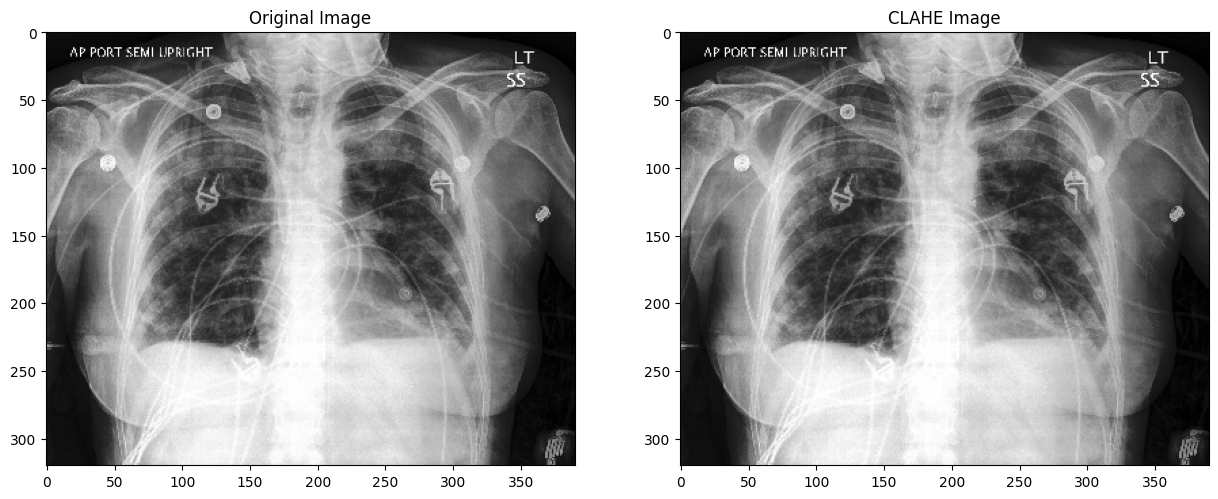

In [44]:
# Histogram Equalization CLAHE(Contrast Limited Adaptive Histogram Equalization)

def clahe_image(img):
    clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8))
    cl_img = clahe.apply(img)
    return cl_img
# clahe = cv2.createCLAHE(clipLimit = 2, tileGridSize=(8,8)) # grid 그린 후 조각냄


plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('CLAHE Image')
plt.show()

### Data Augmentation
    - 데이터의 수를 증가시켜 학습, 평가용 데이터를 추가 확보
    - 데이터의 표본(n수)가 적을 대 주로 사용

In [45]:
!pip install keras

### Noise Reduction

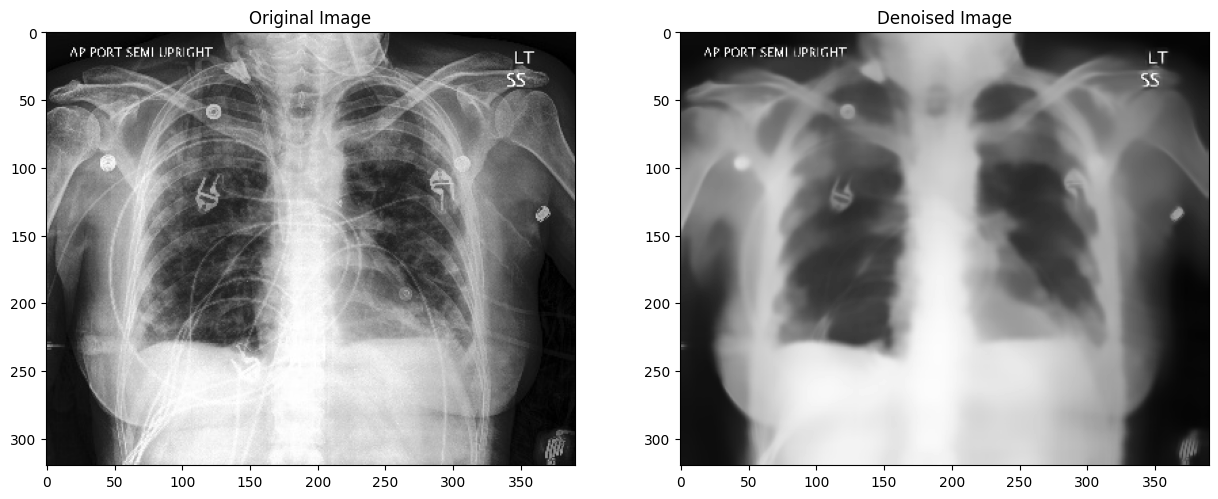

In [46]:
def denoise_img(img):
    return cv2.fastNlMeansDenoising(img, None, 30,7,21 )

denoised_img = denoise_img(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised Image')
plt.show()

# 노이즈제거 강도 -> 노이즈와 형테 모두가 사라짐
# ROI 관심영역 먼저 설정 -> 없애야 하는 부분만 사라지도록 하는 것이 핵심 

In [47]:
?cv2.fastNlMeansDenoising

Docstring:
fastNlMeansDenoising(src[, dst[, h[, templateWindowSize[, searchWindowSize]]]]) -> dst
.   @brief Perform image denoising using Non-local Means Denoising algorithm
.   <http://www.ipol.im/pub/algo/bcm_non_local_means_denoising/> with several computational
.   optimizations. Noise expected to be a gaussian white noise
.   
.   @param src Input 8-bit 1-channel, 2-channel, 3-channel or 4-channel image.
.   @param dst Output image with the same size and type as src .
.   @param templateWindowSize Size in pixels of the template patch that is used to compute weights.
.   Should be odd. Recommended value 7 pixels
.   @param searchWindowSize Size in pixels of the window that is used to compute weighted average for
.   given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater
.   denoising time. Recommended value 21 pixels
.   @param h Parameter regulating filter strength. Big h value perfectly removes noise but also
.   removes image details, small

### Image Normalization
    - 데이터 정규화 처리
    - 연산 효율 높이고 정규성을 생성

In [48]:
# 바로 정규성으로 바로 가지 않음
# 이상치를 줄여주는 효과 <- 비율로 바꾸면서
# norm_type : 보통 minmax를 가장 많이 사용
# 원본이미지 변화가 생기지 않고 수치의 변화만 생김

In [49]:
?cv2.normalize

Docstring:
normalize(src, dst[, alpha[, beta[, norm_type[, dtype[, mask]]]]]) -> dst
.   @brief Normalizes the norm or value range of an array.
.   
.   The function cv::normalize normalizes scale and shift the input array elements so that
.   \f[\| \texttt{dst} \| _{L_p}= \texttt{alpha}\f]
.   (where p=Inf, 1 or 2) when normType=NORM_INF, NORM_L1, or NORM_L2, respectively; or so that
.   \f[\min _I  \texttt{dst} (I)= \texttt{alpha} , \, \, \max _I  \texttt{dst} (I)= \texttt{beta}\f]
.   
.   when normType=NORM_MINMAX (for dense arrays only). The optional mask specifies a sub-array to be
.   normalized. This means that the norm or min-n-max are calculated over the sub-array, and then this
.   sub-array is modified to be normalized. If you want to only use the mask to calculate the norm or
.   min-max but modify the whole array, you can use norm and Mat::convertTo.
.   
.   In case of sparse matrices, only the non-zero values are analyzed and transformed. Because of this,
.   the range 

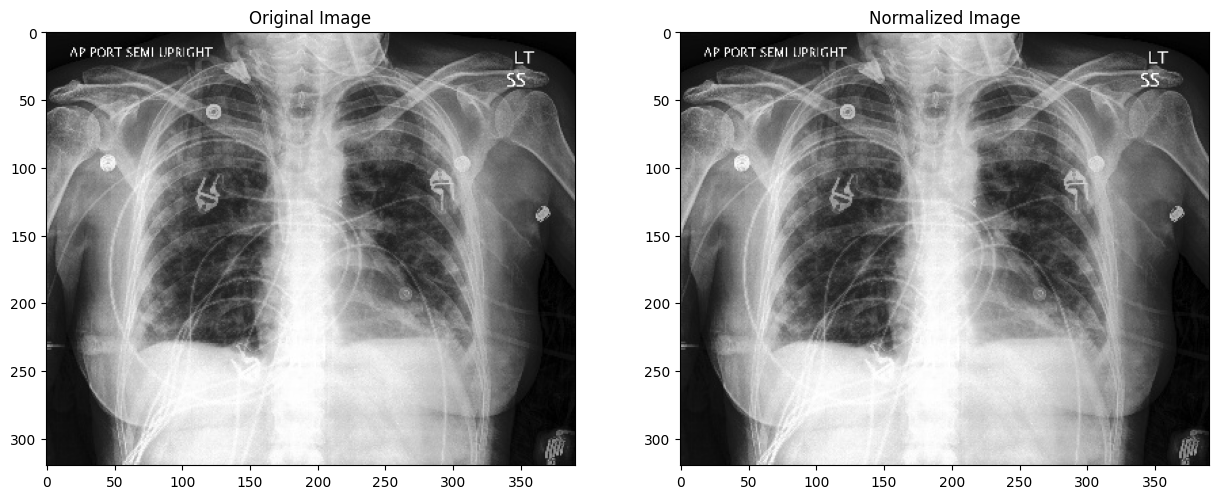

In [50]:
def normalize_img(img):
    return cv2.normalize(img, None, 0,255, cv2.NORM_MINMAX)

normalized_img = normalize_img(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(normalized_img, cmap='gray')
plt.title('Normalized Image')
plt.show()

### Edge Detection

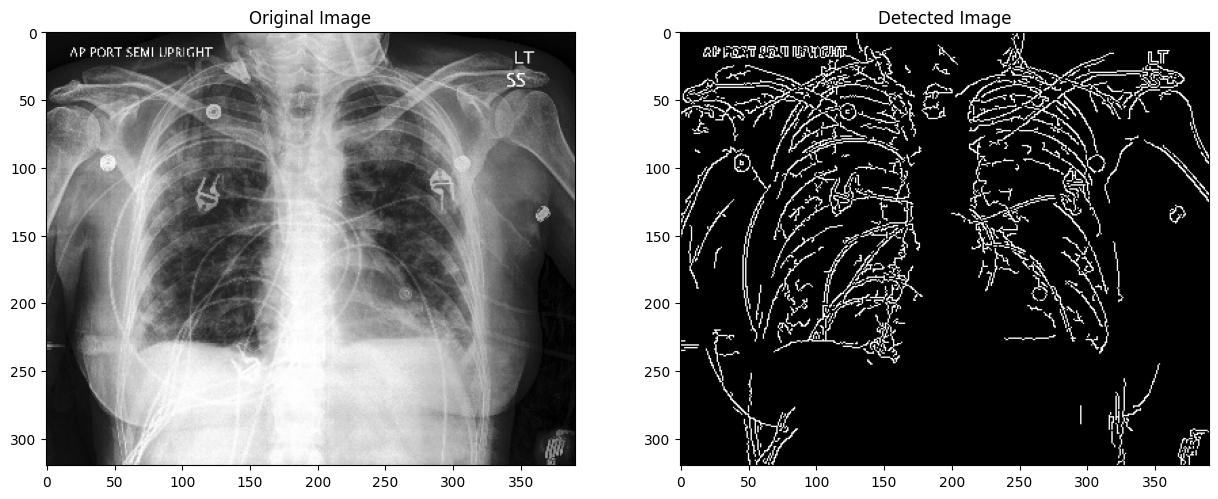

In [51]:
def detect_edge(img):
    return cv2.Canny(img, 100, 200) # threshold 값 : 일정 범위 안의 값들을 찾는다 threshold

detected_img = detect_edge(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(detected_img, cmap='gray')
plt.title('Detected Image')
plt.show()


### Blurring

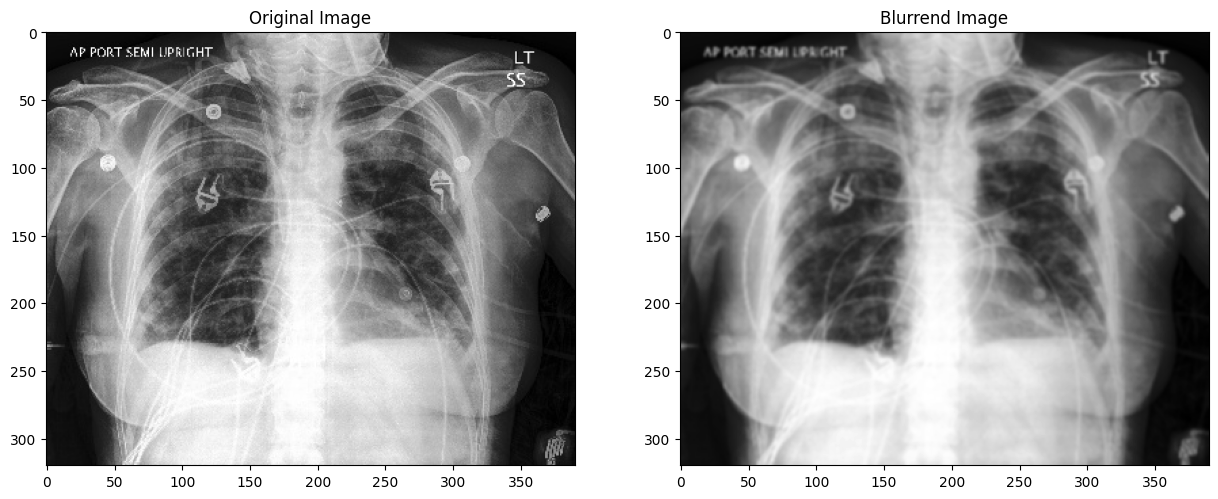

In [52]:
def blur_img(img):
    return cv2.GaussianBlur(img,(5,5), 0)

blurrend_img = blur_img(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blurrend_img, cmap='gray')
plt.title('Blurrend Image')
plt.show()


### Contour Detection

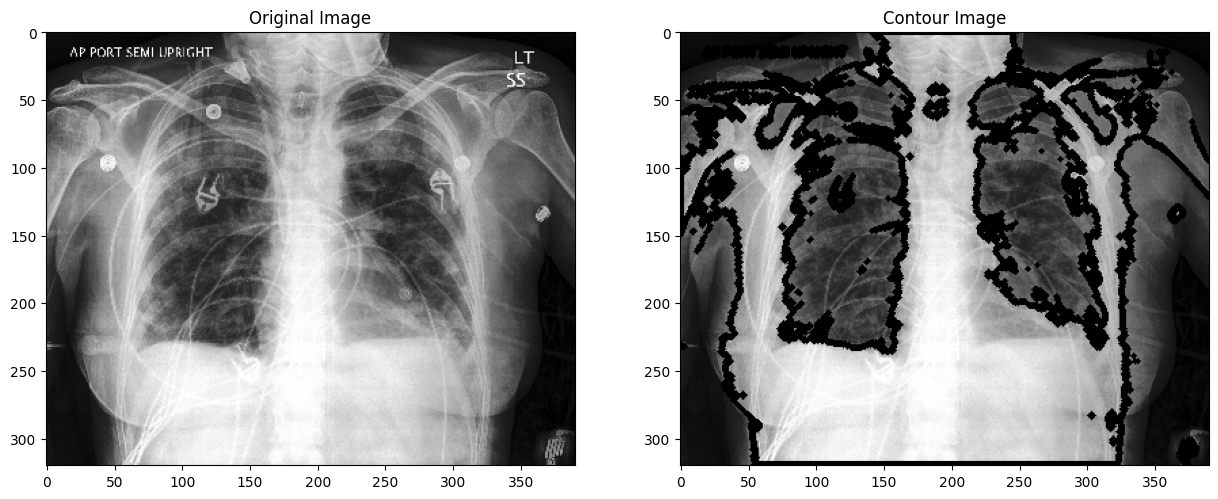

In [53]:
def find_contour(img):
    ret, thresh = cv2.threshold(img, 127, 255, 0) # 선의 역치값(반응하는)
    contours, hiearchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # 2개의 알고리즘 적용
    return contours
contours = find_contour(img) # 이미지의 윤곽선 값을 가져옴
contour_img = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 3)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(contour_img, cmap='gray')
plt.title('Contour Image')
plt.show()


### Data Preparing

In [54]:
def load_data(data_dir):
    images = []
    # labels = []
    for img_path in os.listdir(data_dir):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = resize_image(img)
        img = clahe_image(img)
        img = normalize_img(img)
        images.append(img)

    prepared_datas = np.array(images)        # 대기중인 상태 -> 리턴값의 라벨을 1로 부여하면 됨
    return prepared_datas

In [55]:
%whos

Variable         Type        Data/Info
--------------------------------------
blur_img         function    <function blur_img at 0x000001E40748FB00>
blurrend_img     ndarray     320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
categories       list        n=3
cl_img           ndarray     320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
clahe            CLAHE       < cv2.CLAHE 000001E472649770>
clahe_image      function    <function clahe_image at 0x000001E405F5FBA0>
contour_img      ndarray     320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
contours         tuple       n=615
cv2              module      <module 'cv2' from 'c:\\U<...>kages\\cv2\\__init__.py'>
data_dir         str         ./datas/Pneumonia/Positive/
denoise_img      function    <function denoise_img at 0x000001E405EB4720>
denoised_img     ndarray     320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
detect_edge      function    <function detect_edge at 0x000001E406